<a href="https://colab.research.google.com/github/VIJAYRUR/DL/blob/main/PS_2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
## basic libararies 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('sample_data/Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
## feature engineering

geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
x=x.drop(['Geography','Gender'],axis=1)
# axis=1 indicate to drop col not rows

In [ ]:
x=pd.concat([x,geography,gender],axis=1)

In [ ]:
#splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
# lets create the ANN 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# by sequential we can do front and back prop
# by dense we can create inner nodes i.e neurons
# we use dropout to overcome overfitting

classifier=Sequential()
# ANN is initialized here

In [ ]:
classifier.add(Dense(units=11,activation='relu'))
# input layer

In [ ]:
# adding first hidden layer 

classifier.add(Dense(units=2,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# adding second layer

classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# setting up custom learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4479 - accuracy: 0.7940 - val_loss: 0.4066 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4058 - accuracy: 0.7996 - val_loss: 0.3955 - val_accuracy: 0.8342
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3956 - accuracy: 0.8151 - val_loss: 0.3856 - val_accuracy: 0.8421
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3882 - accuracy: 0.8252 - val_loss: 0.3813 - val_accuracy: 0.8489
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3838 - accuracy: 0.8270 - val_loss: 0.3798 - val_accuracy: 0.8493
Epoch 6/1000
234/536 [============>.................] - ETA: 1s - loss: 0.3749 - accuracy: 0.8402

KeyboardInterrupt: ignored

In [ ]:
# early stopping 
import tensorflow as tf 
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3813 - accuracy: 0.8315 - val_loss: 0.3730 - val_accuracy: 0.8519
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3788 - accuracy: 0.8328 - val_loss: 0.3698 - val_accuracy: 0.8546
Epoch 2: early stopping


In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

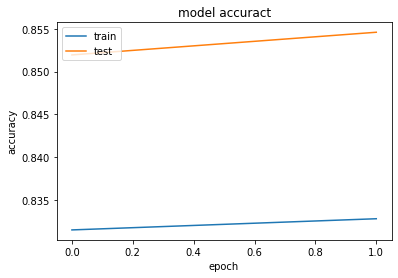

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuract')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
# make prediction 

y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
# metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1495,  100],
       [ 190,  215]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.855